In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from skimage import io

In [2]:
path = '../Data/qualitative_psf/'
name = 'cell_001.png'
inputpath = 'input_maxproj/'
convpath = 'resized_maxproj/'
conv_compare = ['psf_sigma_0.5_aspect_ratio_2.0_voxel_size_[0.3_0.3_0.3]/',
                'psf_sigma_1.2_aspect_ratio_2.0_voxel_size_[0.3_0.3_0.3]/',
                'psf_sigma_0.5_aspect_ratio_6.0_voxel_size_[0.3_0.3_0.3]/',
                'psf_sigma_1.2_aspect_ratio_6.0_voxel_size_[0.3_0.3_0.3]/']
deconvpath = 'deconvolved_upsampled_maxproj/iterative_deconvolve_3d_detect=False_low=2.0_normalize=True_perform=True_terminate=0.1_wiener=1.0/'
dec_compare = ['psf_sigma_0.5_aspect_ratio_2.0_voxel_size_[0.3_0.3_0.3]_voxel_size_[0.1_0.1_0.1]/',
                'psf_sigma_1.2_aspect_ratio_2.0_voxel_size_[0.3_0.3_0.3]_voxel_size_[0.1_0.1_0.1]/',
                'psf_sigma_0.5_aspect_ratio_6.0_voxel_size_[0.3_0.3_0.3]_voxel_size_[0.1_0.1_0.1]/',
                'psf_sigma_1.2_aspect_ratio_6.0_voxel_size_[0.3_0.3_0.3]_voxel_size_[0.1_0.1_0.1]/']

In [3]:
imginput = io.imread(path + inputpath + name)
stack = []
labels = ['PSF: 1 x 0.5 $\mu m$',
          'PSF: 2.4 x 1.2 $\mu m$',
          'PSF: 3 x 0.5 $\mu m$',
          'PSF: 7.2 x 1.2 $\mu m$']
shapes = []
for cpath in conv_compare:
    stack.append(io.imread(path + convpath + cpath + name))
    shapes.append(np.array(stack[-1].shape))
shapes = np.array(shapes)
maxshape = shapes.max(0)

for i in range(len(stack)):
    pad_width = np.int_((maxshape - np.array(stack[i].shape))/2)
    stack[i] = np.pad(stack[i], [(pad_width[0], pad_width[0]), (pad_width[1], pad_width[1])])[50:-50]

stack2 = []
shapes = []
for cpath in dec_compare:
    stack2.append(io.imread(path + deconvpath + cpath + name))
    shapes.append(np.array(stack2[-1].shape))

shapes = np.array(shapes)
maxshape = shapes.max(0)

for i in range(len(stack2)):
    pad_width = np.int_((maxshape - np.array(stack2[i].shape))/2)
    stack2[i] = np.pad(stack2[i], [(pad_width[0], pad_width[0]), (pad_width[1], pad_width[1])])[200:-200]
    

pad_width = int((stack2[0].shape[1] - imginput.shape[1])/2)
imginput = np.pad(imginput, pad_width)

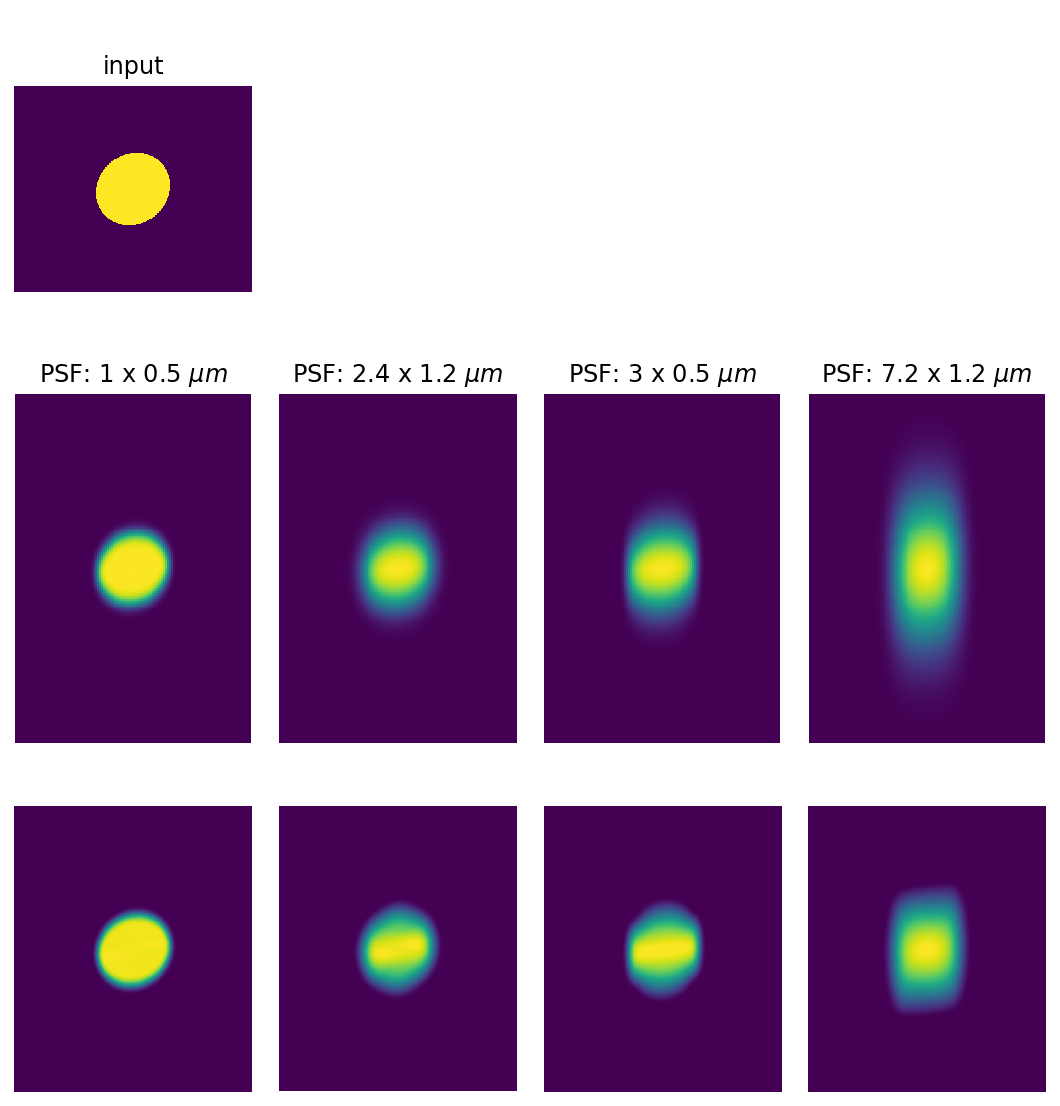

In [4]:
size = (7.5,8)
fig, axs = plt.subplots(3, 4, figsize=size)
plt.sca(axs[0,0])
io.imshow(imginput, cmap='viridis')
plt.axis('off')
plt.title('input')
for i in range(1, 4):
    plt.sca(axs[0,i])
    plt.axis('off')
    
for i in range(4):
    plt.sca(axs[1, i])
    io.imshow(stack[i], cmap='viridis')
    plt.axis('off')
    plt.title(labels[i])
    

for i in range(4):
    plt.sca(axs[2, i])
    io.imshow(stack2[i], cmap='viridis')
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('plot_psf.png', dpi=300)
